In [2]:
#IMPORTING BASIC LIBRARIES NEEDED
import csv, os
import numpy as np
import zipfile
import random
import PIL

import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#Below line specifies that the plots are plotted inside the notebook
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
#Kaggle dataset is downloaded in a zip file. below commands extract that zip file
zip_path = os.path.join("C:\\Users\\mukes\\Downloads", "signlanguage.zip")
zipper = zipfile.ZipFile(zip_path)
zipper.extractall("C:\\Users\\mukes\\Downloads")

In [9]:
# Path to csv file for training data
csv_path = os.path.join("C:\\Users\\mukes\\Downloads","sign_mnist_train.csv")

# Reading data and converting into numpy array
raw_data = pd.read_csv(csv_path)
raw_data = raw_data.astype(np.float32)
arr = np.array(raw_data)

# Using same seed so as to get same random shuffle everytime 
random.Random(42).shuffle(arr)

In [10]:
#Spliting the Data into TRAINING AND VALIDATION SETS
split = int(0.8*len(arr))

train_label = arr[:split,0]
train_data = arr[:split,1:]

val_label = arr[split:,0]
val_data = arr[split:,1:]

# Reshaping the data 
train_data = train_data.reshape(-1, 28, 28,1)
val_data = val_data.reshape(-1, 28, 28,1)

In [11]:
#Repeating same procedure to get TEST DATA
test_csv_path = os.path.join("C:\\Users\\mukes\\Downloads","sign_mnist_test.csv")

test_raw_data = pd.read_csv(test_csv_path)
test_raw_data = test_raw_data.astype(np.float32)
test_arr = np.array(test_raw_data)

random.Random(42).shuffle(test_arr)

test_label = test_arr[:,0]
test_data = test_arr[:,1:]

test_data = test_data.reshape(-1, 28, 28,1)

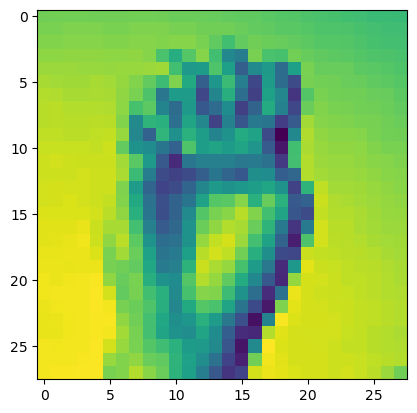

In [13]:
#Plotting a random image to check sanity
plt.imshow(train_data[120])

In [14]:
#Reducing the Data between 0 and 1 so the CNN can perform better
train_data = train_data/(255)
val_data = val_data/(255)
test_data = test_data/(255)

In [15]:
#SANITY CHECK OF DATASETS
print("train data shape:" + str(train_data.shape))
print("train label shape:" + str(train_label.shape))

print("\nValidation data shape:" + str(val_data.shape))
print("Validation label shape:" + str(val_label.shape))

print("\nTest data shape:" + str(test_data.shape))
print("Test label shape:" + str(test_label.shape))

train data shape:(21964, 28, 28, 1)
train label shape:(21964,)

Validation data shape:(5491, 28, 28, 1)
Validation label shape:(5491,)

Test data shape:(7172, 28, 28, 1)
Test label shape:(7172,)


In [16]:
#DEFINING MODEL TO BE USED
model = keras.Sequential([
    layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, (3,3), activation = 'relu', padding = "SAME"),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, (3,3), activation = 'relu', padding = "SAME"),
    layers.Conv2D(128, (3,3), activation = 'relu', padding = "SAME"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, (3,3), activation = 'relu', padding = "SAME"),
    layers.Conv2D(256, (3,3), activation = 'relu', padding = "SAME"),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(25, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 128)         1

In [18]:
#COMPILING the MODEL
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsProp', metrics = ['acc'])

In [19]:
# FITTING the MODEL onto TRAINING data and Validating on VALIDATION data.
history = model.fit(train_data, train_label, epochs = 30, batch_size = 256,
                        validation_data = (val_data, val_label), verbose = 1)

Epoch 1/30
86/86 [==============================] - 48s 542ms/step - loss: 3.1417 - acc: 0.0631 - val_loss: 2.6594 - val_acc: 0.1417
Epoch 2/30
86/86 [==============================] - 44s 517ms/step - loss: 2.2578 - acc: 0.2694 - val_loss: 1.3701 - val_acc: 0.5919
Epoch 3/30
86/86 [==============================] - 50s 581ms/step - loss: 1.2523 - acc: 0.5672 - val_loss: 0.4376 - val_acc: 0.8661
Epoch 4/30
86/86 [==============================] - 47s 543ms/step - loss: 0.5989 - acc: 0.7961 - val_loss: 0.1588 - val_acc: 0.9612
Epoch 5/30
86/86 [==============================] - 44s 514ms/step - loss: 0.2572 - acc: 0.9146 - val_loss: 0.0228 - val_acc: 0.9914
Epoch 6/30
86/86 [==============================] - 44s 517ms/step - loss: 0.1602 - acc: 0.9530 - val_loss: 0.0082 - val_acc: 0.9987
Epoch 7/30
86/86 [==============================] - 45s 521ms/step - loss: 0.0877 - acc: 0.9750 - val_loss: 0.3758 - val_acc: 0.9392
Epoch 8/30
86/86 [==============================] - 45s 523ms/step - 

In [20]:
#EVALUATING the models accuracy on TEST DATA ( which the model has never seen before)
history2 = model.evaluate(test_data,test_label)

225/225 [==============================] - 3s 11ms/step - loss: 0.2753 - acc: 0.9476


In [21]:
#Checking the accuracy and loss on test data
print("Test Accuracy is", history2[1])
print("Test loss is", history2[0])

Test Accuracy is 0.9475739002227783
Test loss is 0.2752895951271057


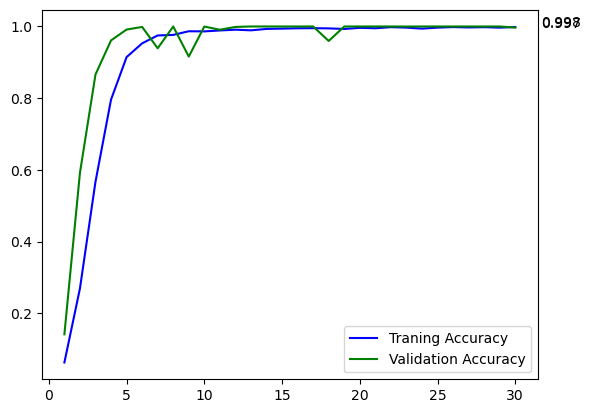

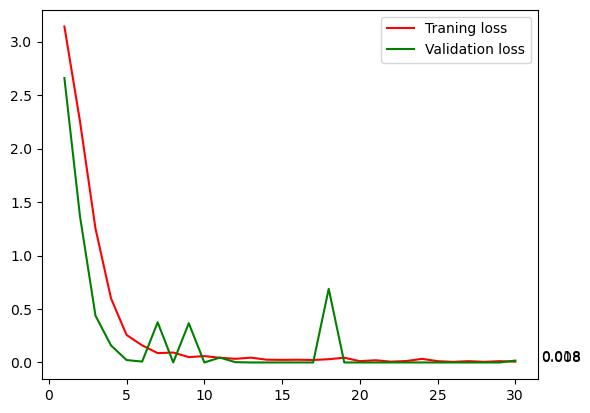

In [22]:
#PLOTTING THE TRAINING GRAPHS 
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch,acc,"b", label = "Traning Accuracy")
plt.annotate("%0.3f" % acc[-1], xy=(1, acc[-1]),xytext=(2, 0),
            xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.plot(epoch,val_acc,"g", label = "Validation Accuracy")
plt.annotate("%0.3f" % val_acc[-1], xy=(1, val_acc[-1]),xytext=(2, 0),
            xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.legend()
plt.show()

plt.plot(epoch,loss,"r", label = "Traning loss")
plt.annotate("%0.3f" % loss[-1], xy=(1, loss[-1]),xytext=(2, 0),
            xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.plot(epoch,val_loss,"g", label = "Validation loss")
plt.annotate("%0.3f" % val_loss[-1], xy=(1, val_loss[-1]),xytext=(2, 0),
            xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.legend()
plt.show()

In [23]:
#SAVING THE MODEL SO IT CAN BE USED LATER
model.save("C:\\Users\\mukes\\Downloads" + '/SignLanguage.h5')

C:\Users\mukes\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model.save("C:\\Users\\mukes\\Downloads" + '/SignLanguage.keras')

In [25]:
#WEBCAM PROGRAM

import cv2
import numpy as np
import tensorflow as tf

ModuleNotFoundError: No module named 'cv2'

In [26]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [27]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
#WEBCAM PROGRAM

import cv2
import numpy as np
import tensorflow as tf

In [32]:
# Load the pre-trained sign language recognition model
model = tf.keras.models.load_model("C:\\Users\\mukes\\Downloads\\SignLanguage.h5")  # Replace with your model file path

In [33]:
# Define a list of class labels corresponding to the signs the model can recognize
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [38]:
import cv2
import numpy as np
import tensorflow as tf

# Load the pre-trained sign language recognition model
model = tf.keras.models.load_model("C:\\Users\\mukes\\Downloads\\SignLanguage.h5")  # Replace with your model file path

# Define a list of class labels corresponding to the signs the model can recognize
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Define the coordinates for your ROI (region of interest)
roi_x = 100
roi_y = 100
roi_width = 200
roi_height = 200

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Extract the ROI from the frame
    roi = frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

    # Convert the ROI to grayscale
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Preprocess the grayscale image (resize, normalize, etc.)
    resized_roi = cv2.resize(gray_roi, (28, 28))  # Resize to 28x28 pixels
    normalized_roi = resized_roi / 255.0  # Normalize pixel values to the range [0, 1]
    input_data = np.expand_dims(normalized_roi, axis=0)  # Add a batch dimension
    input_data = np.expand_dims(input_data, axis=-1)  # Add a channel dimension

    # Perform sign language recognition
    predictions = model.predict(input_data)
    predicted_class = class_labels[np.argmax(predictions)]

    # Display the prediction on the frame
    cv2.putText(frame, f"Sign: {predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw a rectangle around the ROI
    cv2.rectangle(frame, (roi_x, roi_y), (roi_x+roi_width, roi_y+roi_height), (0, 255, 0), 2)

    # Display the frame with the prediction
    cv2.imshow('Sign Language Recognition', frame)

    # Exit the program when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 66ms/step
